In [378]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#data visualization
import seaborn as sb
import matplotlib.pyplot as plt

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [379]:
#reading data from csv file to dataframe
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [380]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [381]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [382]:
#check what features are present in dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [383]:
#check for the data types of features
train_df.info()
print('*'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [384]:
#check for the distribution of the numerical features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [385]:
#check for the distribution of the categorical features - all these are objects
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

train_df.describe(include=['O'])  #it's capital O (alphabet)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strandberg, Miss. Ida Sofia",male,1601,G6,S
freq,1,577,7,4,644


### Checking for number of null values in each feature in train and test dataset

In [386]:
train_df['Pclass'].isnull().sum(), test_df['Pclass'].isnull().sum()

(0, 0)

In [387]:
train_df['Name'].isnull().sum(), test_df['Name'].isnull().sum()

(0, 0)

In [388]:
train_df['Sex'].isnull().sum(), test_df['Sex'].isnull().sum()

(0, 0)

In [389]:
train_df['Age'].isnull().sum(), test_df['Age'].isnull().sum()

(177, 86)

In [390]:
train_df['SibSp'].isnull().sum(), test_df['SibSp'].isnull().sum()

(0, 0)

In [391]:
train_df['Parch'].isnull().sum(), test_df['Parch'].isnull().sum()

(0, 0)

In [392]:
train_df['Ticket'].isnull().sum(), test_df['Ticket'].isnull().sum()

(0, 0)

In [393]:
train_df['Fare'].isnull().sum(), test_df['Fare'].isnull().sum()

(0, 1)

In [394]:
train_df['Cabin'].isnull().sum(), test_df['Cabin'].isnull().sum()

(687, 327)

In [395]:
train_df['Embarked'].isnull().sum(), test_df['Embarked'].isnull().sum()

(2, 0)

### Checking for duplicates in train and test dataset

In [396]:
#checking if duplicate rows are present (considers row to check)
train_df.duplicated().sum()

0

In [399]:
train_df['Name'].duplicated().sum(), test_df['Name'].duplicated().sum()

(0, 0)

In [400]:
train_df['Ticket'].duplicated().sum(), test_df['Ticket'].duplicated().sum()

(210, 55)

### Checking the percentage of survived w.r.t categorical features

In [401]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 
        'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [402]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [403]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [404]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [405]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [406]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Observations:
- Higher class people survived most
- Females are survived most when compared to Males.
- People with less siblings have survived most
- People embarked at C have survived most

## Histogram visualization

### Correlating numerical features - Age

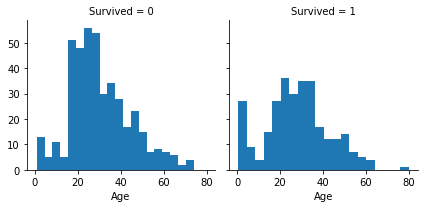

In [407]:
#age is a continuous numerical variable so we are plotting histogram to check
age = sb.FacetGrid(train_df, col = 'Survived')
age.map(plt.hist, 'Age', bins = 20)

### Observations:
- People between age 15 to 35 were not likely to survive when compared to other aged people. 
- People aged less than 4 and old aged people were more likely to have survived
- So let's include Pclass and correlate with Age to see the survival rate

### Correlating numerical and ordinal features - Age and Pclass

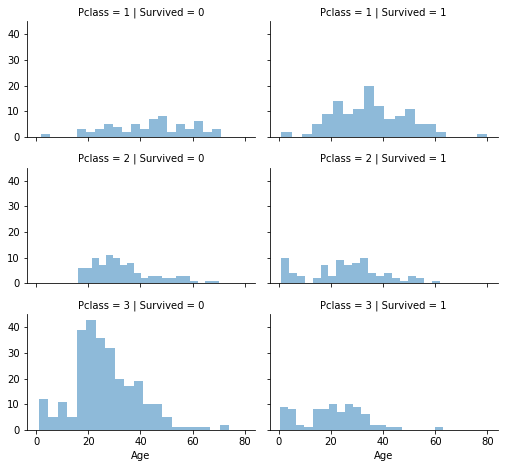

In [408]:
page = sb.FacetGrid(train_df, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
page.map(plt.hist, 'Age', alpha = .5, bins = 20)
page.add_legend()

### Observations:
- People in class 1 (upper class) and aged from 15-35 and infants below age 4 survived most
- People in class 3 were not survived most except for infants

#### Can't tell how embarked is directly affecting the survival rate. So, we correlate with other features to check

### Correlating categorical features - Embarked, Pclass, Sex

In [409]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\Supriya\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Supriya\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


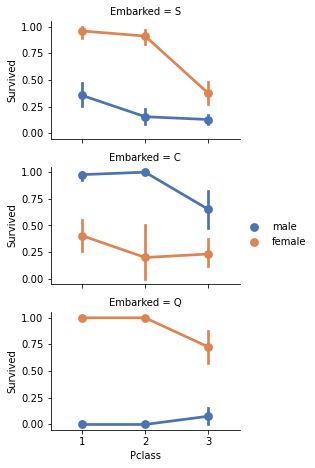

In [410]:
#https://seaborn.pydata.org/generated/seaborn.pointplot.html
pes = sb.FacetGrid(train_df, row = 'Embarked', height = 2.2, aspect = 1.6)
pes.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
pes.add_legend()

### Observations:
- Females embarked at S and Q and in class 1 are survived most
- But Males embarked at C and in class 1 are survived most

### Correlating categorical non-numeric features with numerical features - Embarked, Sex, Fare

C:\Users\Supriya\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


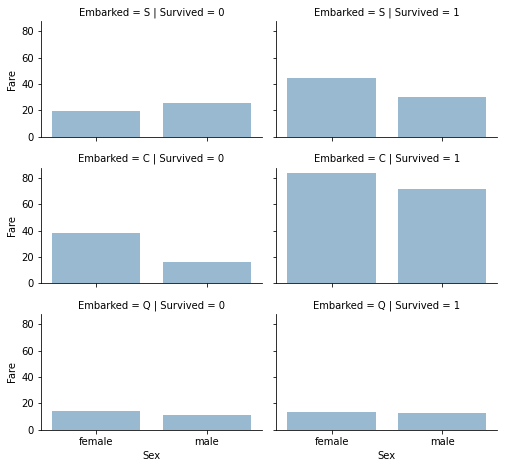

In [411]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
sefs = sb.FacetGrid(train_df, row = 'Embarked', col = 'Survived', height = 2.2, aspect = 1.6)
sefs.map(sb.barplot, 'Sex', 'Fare', alpha = .5, ci = None)
sefs.add_legend()

### Observations:
- People, both males and females embarked at C with higher fare have survived most
- So, we need Embarked, Fare, Sex, Pclass, Age features as of now

### Correlating between categorical and numerical independent features - Sex, Age, PClass

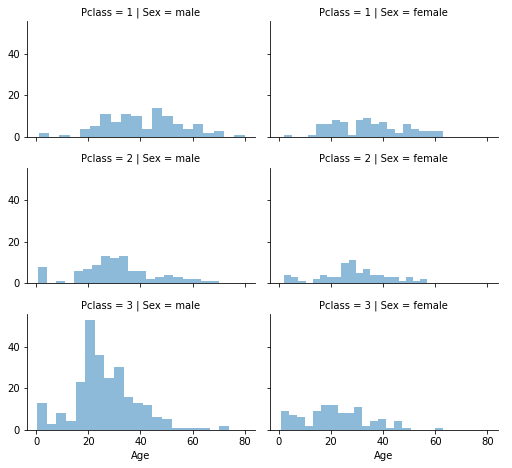

In [412]:
sap = sb.FacetGrid(train_df, col = 'Sex', row = 'Pclass', height = 2.2, aspect = 1.6)
sap.map(plt.hist, 'Age', alpha = .5, bins = 20)
sap.add_legend()

### Observations:
- Males between age group 15 - 35 fall in class 3

### Dropping irrelevant features

In [413]:
print("Size of train and test data before dropping: ", train_df.shape, test_df.shape)

Size of train and test data before dropping:  (891, 12) (418, 11)


In [414]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
print("Size of train and test data after dropping: ", train_df.shape, test_df.shape)

Size of train and test data after dropping:  (891, 10) (418, 9)


In [415]:
combine = [train_df, test_df]

### Creating new features out of existing features

#### Let's sort out the Names with their titles as basis

In [416]:
#creating title feature from Name and correlating with sex
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [417]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady',\
                                                 'Major', 'Rev', 'Sir'], 'Rare')
train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Convert categorical features into ordinal features - Name

In [418]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [419]:
#remove Name and PassengerId from train dataset
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)

In [420]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [421]:
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]

In [422]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1.0
1,893,3,female,47.0,1,0,7.0000,S,3.0
2,894,2,male,62.0,0,0,9.6875,Q,1.0
3,895,3,male,27.0,0,0,8.6625,S,1.0
4,896,3,female,22.0,1,1,12.2875,S,3.0


In [423]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature into numerical - Sex

In [424]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Fill missing/null values in features

In [425]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [426]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            #print(guess_df.head())
            age_guess = guess_df.median()
            #print('age_guess',age_guess)
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5
            #print('guess_ages', guess_ages)
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


### Covert continuous numerical features into categorical features - Age

In [427]:
#https://pandas.paydata.org/docs/reference/api/pandas.cut.html
train_df['Age_band'] = pd.cut(train_df['Age'], 5)
train_df[['Age_band', 'Survived']].groupby(['Age_band'], as_index = False).mean().sort_values(by = 'Age_band',\
                                                                                              ascending = True)

,Age_band,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


### Replace the variables with bands with ordinal values - Age

In [428]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_band
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [429]:
train_df = train_df.drop(['Age_band'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create a new feature called family to mix siblings, parents and children

In [430]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
    
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived',\
                                                                                                  ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Create another feature called IsAlone for the family

In [431]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['Survived', 'IsAlone']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Lets drop SibSp, Parch, FamilySize features

In [432]:
train_df = train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
test_df = test_df.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Create an artificial feature out of Age and PClass.

In [433]:
#because we see some correlation between Age and PClass before

for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age*dataset.Pclass
    
train_df.loc[:, ['Age*Pclass', 'Age', 'Pclass']].head(10)

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### There are two missing values in embarked feature in train dataset and then convert the values into numbers

In [434]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [435]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', \
                                                                                             ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [436]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C':1, 'Q': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### Fill in the missing value of fare in test data

In [437]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


#### Convert fare into categorical feature

In [438]:
#https://pandas.pydata.org/docs/reference/api/pandas.qcut.html
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', \
                                                                                             ascending = True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [439]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    #dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0.0,0,1,0,3
1,1,1,1,2,3.0,1,3,0,2
2,1,3,1,1,1.0,0,2,1,3
3,1,1,1,2,3.0,0,3,0,2
4,0,3,0,2,1.0,0,1,1,6


In [440]:
 test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0.0,2,1.0,1,6
1,893,3,1,2,0.0,0,3.0,0,6
2,894,2,0,3,1.0,2,1.0,1,6
3,895,3,0,1,1.0,0,1.0,1,3
4,896,3,1,1,1.0,0,3.0,0,3


### Now, let's Model and Predict

#### Dividing into train and test dataset

In [441]:
X_train = train_df.drop(['Survived'], axis = 1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis = 1).copy()

In [442]:
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### Logistic regression

In [443]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.37

### Support vector machine

In [444]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

82.83

### KNN

In [445]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.06

### Gaussian Naive Bayes

In [446]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, Y_train)*100, 2)
acc_gnb

76.88

### Perceptron

In [447]:
per = Perceptron()
per.fit(X_train, Y_train)
Y_pred = per.predict(X_test)
acc_per = round(per.score(X_train, Y_train)*100, 2)
acc_per

79.35

### Linear SVC

In [448]:
lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)
Y_pred = lsvc.predict(X_test)
acc_lsvc = round(lsvc.score(X_train, Y_train)*100, 2)
acc_lsvc

C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.46

### Stochastic Gradient Descent

In [449]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
acc_sgd

67.68

### Decision Tree

In [450]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_train, Y_train)*100, 2)
acc_dtc

86.64

### Random Forest

In [451]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train, Y_train)*100, 2)
acc_rf

86.64

In [452]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest',
             'Stochastic Gradient Descent', 'Perceptron', 'Linear SVC', 'KNN'], 
    'Score': [acc_log, acc_svc, acc_gnb, acc_dtc, acc_rf, acc_sgd, acc_per, acc_lsvc, acc_knn]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree,86.64
4,Random Forest,86.64
8,KNN,84.06
1,Support Vector Machine,82.83
0,Logistic Regression,81.37
7,Linear SVC,79.46
6,Perceptron,79.35
2,Gaussian Naive Bayes,76.88
5,Stochastic Gradient Descent,67.68


### Random Forest and Decision Tree predicts with most accuracy

#### Additional code just to find out pearson correlation coefficient for numerical features

In [ ]:
from scipy.stats import pearsonr

In [33]:
train_df = train_df.fillna(0)

In [34]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.45,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,0,Q


In [55]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

corr_pclass, p_pclass = pearsonr(train_df['Pclass'], train_df['Survived'])
corr_age, p_age = pearsonr(train_df['Age'], train_df['Survived'])
corr_sibsp, p_sibsp = pearsonr(train_df['SibSp'], train_df['Survived'])
corr_parch, p_parch = pearsonr(train_df['Parch'], train_df['Survived'])
corr_fare, p_fare = pearsonr(train_df['Fare'], train_df['Survived'])

In [56]:
print("Correlation coefficient of pclass is: ",corr_pclass," and it's p value is: ",p_pclass)
print("Correlation coefficient of age is: ",corr_age," and it's p value is: ",p_age)
print("Correlation coefficient of sibsp is: ",corr_sibsp," and it's p value is: ",p_sibsp)
print("Correlation coefficient of parch is: ",corr_parch," and it's p value is: ",p_parch)
print("Correlation coefficient of fare is: ",corr_fare," and it's p value is: ",p_fare)

Correlation coefficient of pclass is:  -0.3384810359610166  and it's p value is:  2.537047387977477e-25
Correlation coefficient of age is:  0.010539215871285708  and it's p value is:  0.7534004969389326
Correlation coefficient of sibsp is:  -0.03532249888573566  and it's p value is:  0.29224392869800203
Correlation coefficient of parch is:  0.08162940708348386  and it's p value is:  0.014799245374711896
Correlation coefficient of fare is:  0.25730652238496377  and it's p value is:  6.120189341916209e-15


#### observation: correlation is positive only for age, parch and fare